In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

/anaconda3/envs/dataScience/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
(data, labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

indexes = np.arange(data.shape[0])
np.random.shuffle(indexes)

train_data = data[indexes[:50000]]
train_labels = labels[indexes[:50000]]

val_data = data[indexes[50000:]]
val_labels = labels[indexes[50000:]]

print(train_data.shape, train_labels.shape)
print(val_data.shape, val_labels.shape)
print(test_data.shape, test_labels.shape)

11493376/11490434 [==============================] - 77s 7us/step
(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


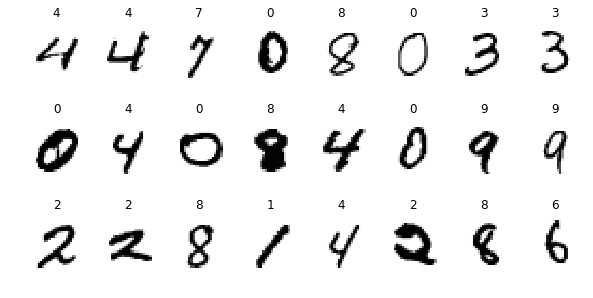

In [3]:
indexes = np.random.choice(train_data.shape[0], 24, replace = False)
train_data_sample = train_data[indexes]
train_labels_sample = train_labels[indexes]

f, axes = plt.subplots(3, 8, figsize = (10, 5))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(train_data_sample[i], cmap = plt.cm.gray_r)
    a.set_title(train_labels_sample[i])
    a.axis('off')

plt.show()

In [4]:
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], train_data.shape[1], 1)
val_data = val_data.reshape(val_data.shape[0], val_data.shape[1], val_data.shape[1], 1)
test_data = test_data.reshape(test_data.shape[0], test_data.shape[1], test_data.shape[1], 1)

train_data = train_data.astype('float32') / 255
val_data = val_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
val_labels = tf.keras.utils.to_categorical(val_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

print(train_data.shape, train_labels.shape)
print(val_data.shape, val_labels.shape)
print(test_data.shape, test_labels.shape)

(50000, 28, 28, 1) (50000, 10)
(10000, 28, 28, 1) (10000, 10)
(10000, 28, 28, 1) (10000, 10)


In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

model.fit(train_data, train_labels,
          batch_size = 128,
          epochs = 1,
          validation_data = (val_data, val_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 52s 1ms/step - loss: 0.1772 - acc: 0.9476 - val_loss: 0.0667 - val_acc: 0.9796


In [7]:
score = model.evaluate(test_data, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 3s 313us/step
Test loss: 0.05667382814302109
Test accuracy: 0.9813


In [8]:
model.save('MNIST.h5')